# **Transformers**

**An Introduction to Natural Language Processing with Transformers**

The HuggingFace Transformers Library consists of thousands of pre-trained models which are trained on huge datasets for thousands of GPU hours and made available to us such that we can use it or fine-tune it for our specific applications.

The https://huggingface.co/models consists of various pre-trained models for different tasks which can be downloaded and used easily. It also supports Hosted Inference API such that we can directly enter the input text and get the output.

# Installation

If you are using a jupyter notebook or google colab then, run this command in the cell to install transformers library

In [ ]:
!pip install transformers[sentencepiece]

To install the library in the local environment follow this link --https://huggingface.co/course/chapter0

# Pipeline API

The pipeline API is a high-level API that performs all the required steps i.e. preprocessing of inputs, getting model predictions and performing post-processing of outputs. This API allows us to directly input any text and get an intelligible answer.

It supports a variety of NLP tasks, some being:
* Sentiment Analysis: Classifying input sentences as positive or negative   
* Feature Extraction: Getting vector representation of the input
* Question Answering: Answering questions given the context
* Summarization: Getting the summary given the input text.
* Text Translation
* Named Entity Recognition
* Mask Filling etc....





# Getting Started with Transformers Library

We have seen the Pipeline API which takes the raw text as input and gives out model predictions in text format which makes it easier to perform inference and testing on any model. Now let’s explore and understand how the pipeline API works and the different components involved in it.

# Tokenizers

Like any other neural network, the **transformers** also can’t process the raw input text directly, hence it needs to be preprocessed into a form that the model can make sense of. This process is called tokenization where text input is converted into numbers. To do this we use a tokenizer that does the following
Splitting the input text into words, subwords, or individual letters that are called tokens.
Mapping each token with a unique integer.
Arranging and adding required inputs that are useful to the model.
The preprocessing and tokenization process needs to be done in the same way as when the model was trained.  Since we are using pre-trained models, we need to use the corresponding tokenizer for the model and this can be achieved by using **AutoTokenizer** class.

In [ ]:
from transformers import AutoTokenizer
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

In the above code, we have imported the AutoTokenizer class from the transformers library and initialized the model checkpoint name.


Now let’s initialize the tokenizer,

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=checkpoint)

When the above code is executed, the tokenizer of the model named **distilbert-base-uncased-finetuned-sst-2-english** is downloaded and cached for further usage. You can find more info about the model on this model here.

Now we can use this tokenizer directly on the raw text to get a dictionary of tensors to feed it directly to the model. The transformers will only accept tensors as input, hence the tokenizer return the input in tensor form.


raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",

    "I am very excited about training the model !!",
    
    "I hate this weather which makes me feel irritated  !"
]


inputs = tokenizer(raw_inputs, padding=True, truncation=True,

return_tensors="pt")


print(inputs)

**Output :**

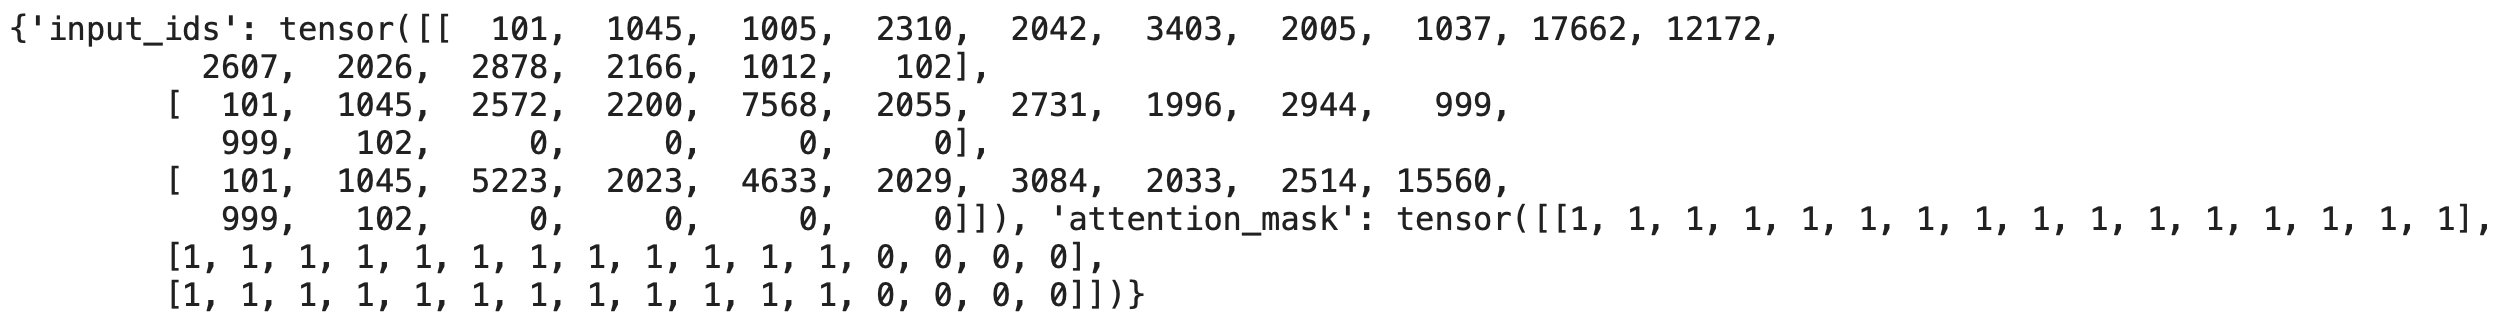

# Model using Transformers Library

We can download the pre-trained model the same way we downloaded the tokenizer.

In [ ]:
from transformers import AutoModel
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"

We are using the same **from_pretrained** method from the **AutoModel** class to load the **pre-trained** model.

In [ ]:
model = AutoModel.from_pretrained(checkpoint)

Similar to the **tokenizer**, the model is also downloaded and cached for further usage. When the above code is executed, the base model without any head is installed i.e. for any input to the model we will retrieve a **high-dimensional vector** representing contextual understanding of that input by the Transformer model.

The above transformer model which **encoder-decoder** architecture is able to extract useful and important **features/contextual** understanding from the input text, which can be further used for any task like text classification, language modeling, etc…

The output of the model is a high dimensional vector and it has three dimensions,

Batch size: The number of sequences processed at a time.

Sequence Length: The length of each sequence or numerical representation.

Hidden Size: The vector dimension of model input.

In [ ]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

**Output :**



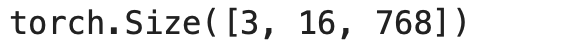

We can get the outputs bypassing the tokenized inputs into the model. From the shape of the output’s hidden state, we can see that our model has a batch size of 3, a sequence length of 16, and a hidden state of size 768

The above output of the transformer model can be sent a model head to perform our required task.



* AutoModelForSequenceClassification – This class is used to get a text
classification model from the checkpoint.
* AutoModelForCasualLM – This class is used to get a language model from the given checkpoint.
* AutoModelForQuestionAnswering – This class is used to get a model to perform
context-based question answering etc…

There are different architecture available in the Transformers library, each one designed for a specific task.
Now let’s finally look at a Sequence classification task and how it can be done using AutoModel.

# Sequence Classification

Now let’s import the AutoModel and AutoTokenizer classes and get our model and tokenizer from the checkpoint.

Now let’s download the model and get some predictions,

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

We use the same **from_pretrained** method we used previously to get our classification model.



In [ ]:
raw_inputs = [

    "I've been waiting for a HuggingFace course my whole life.",
    "I am very excited about training the model !!",
    "I hate this weather which makes me feel irritated  !"
]

inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")

print(inputs)

# We now have the tokenized inputs ready. Now let’s get the predictions,

outputs = model(**inputs)

print(outputs)

**Outut  :**

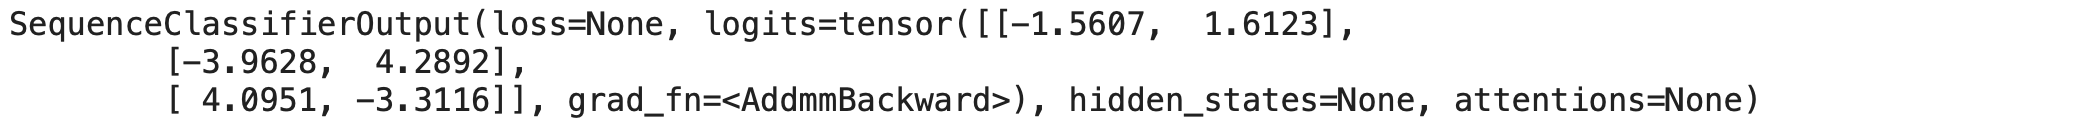

In [ ]:
print(outputs.logits.shape)

**Output:**


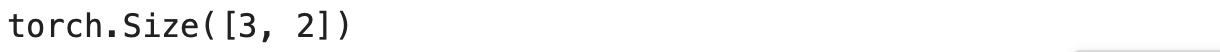

We can apply the softmax activation to our outputs for easy understanding,

In [ ]:
import torch
outputs = torch.nn.functional.softmax(outputs.logits, dim = -1)
print(outputs)

**Output :**

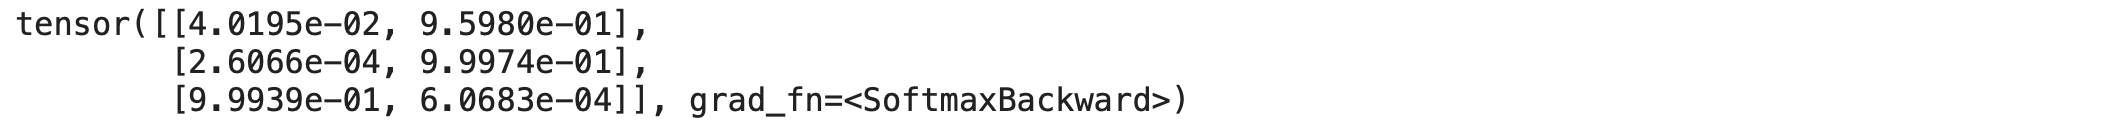

We have [0.04, 0.95] as the output for the first input, [0.0002, 0.99] as the output for the second input, and finally [0.99, 0.000006] as the output for the third input sample.

If we check the labels of the model by,

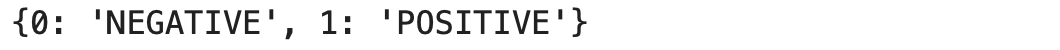

# Code

In [ ]:
# Imports
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
# Define the model checkpoint
checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
# Download and cache the tokenizer and classification model
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
# Define the inputs and tokenize them
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I am very excited about training the model !!",
    "I hate this weather which makes me feel irritated  !"
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)
# Get the outputs from the model
outputs = model(**inputs)
print(outputs)
# Find the class/label probabilities
outputs = torch.nn.functional.softmax(outputs.logits, dim = -1)
print(outputs)
# Find the label to class mapping for verification
print(model.config.id2label)

# Conclusion

We have seen that we can download the pre-trained models and tokenizers and use them directly on our own dataset. From the above example, we have seen that the pre-trained model was able to classify the label/sentiment of input sequences with almost 100% confidence.

Hence we can conclude that these pre-trained models can be used to creating state-of-the-art NLP systems and by fine-tuning it on our own datasets we can be able to get awesome results by yielding higher scores in the required metric.